## 1. Import Required Libraries

In [1]:
from pathlib import Path
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from eda_starter_template import load_bitcoin_data

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Set paths
PROJECT_ROOT = Path().resolve().parent #Path.cwd()
DATA_DIR = PROJECT_ROOT / "data"
COINMETRICS_PATH = DATA_DIR / "Coin Metrics" / "coinmetrics_btc.csv"
POLYMARKET_DIR = DATA_DIR / "Polymarket"

print(f"Project path: {PROJECT_ROOT}")
print(f"Data path: {DATA_DIR}")

Project path: C:\Users\jupark\OneDrive\practicum\GT-MSA-Spring-2026-Team-09
Data path: C:\Users\jupark\OneDrive\practicum\GT-MSA-Spring-2026-Team-09\data


## 2. Load Bitcoin Data

In [2]:
# Load Bitcoin data
btc_df = load_bitcoin_data(COINMETRICS_PATH)

if "time" in btc_df.columns:
    btc_df = btc_df.rename({"time": "date"})

# Convert to pandas for plotting and seaborn compatibility
btc_pd = btc_df.to_pandas()

print(f"Bitcoin data shape: {btc_df.shape}")
print(f"Date range: {btc_df['date'].min()} ~ {btc_df['date'].max()}")

Loading Bitcoin data from C:\Users\jupark\OneDrive\practicum\GT-MSA-Spring-2026-Team-09\data\Coin Metrics\coinmetrics_btc.csv...
[Memory] Before loading Bitcoin data: 218.45 MB
[Memory] After loading Bitcoin data: 229.09 MB (Δ 10.63 MB)
Successfully loaded 6221 rows.
Bitcoin data shape: (6221, 32)
Date range: 2009-01-03 00:00:00 ~ 2026-01-14 00:00:00


## 3. Statistical Summary

In [3]:
# Technical statistics
btc_df.describe()

statistic,date,AdrActCnt,AdrBalCnt,AssetCompletionTime,AssetEODCompletionTime,BlkCnt,CapMVRVCur,CapMrktCurUSD,CapMrktEstUSD,FeeTotNtv,FlowInExNtv,FlowInExUSD,FlowOutExNtv,FlowOutExUSD,HashRate,IssTotNtv,IssTotUSD,PriceBTC,PriceUSD,ROI1yr,ROI30d,ReferenceRate,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,SplyCur,SplyExNtv,SplyExUSD,SplyExpFut10yr,TxCnt,TxTfrCnt,volume_reported_spot_usd_1d
str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64
"""count""","""6221""",6220.0,6220.0,6220.0,6220.0,6220.0,5659.0,5659.0,"""2398""",6220.0,6220.0,5659.0,6220.0,5659.0,6214.0,6214.0,5659.0,6220.0,5659.0,5294.0,5629.0,"""7""","""7""","""7""","""7""",6220.0,6220.0,5659.0,6214.0,6220.0,6220.0,5659.0
"""null_count""","""0""",1.0,1.0,1.0,1.0,1.0,562.0,562.0,"""3823""",1.0,1.0,562.0,1.0,562.0,7.0,7.0,562.0,1.0,562.0,927.0,592.0,"""6214""","""6214""","""6214""","""6214""",1.0,1.0,562.0,7.0,1.0,1.0,562.0
"""mean""","""2017-07-10 00:00:00""",500905.731672,2.0809e7,1.6364e9,1.6364e9,149.86881,1.989795,3.8264e11,null,48.228897,25838.964889,5.0364e8,26577.134164,5.5848e8,1.5146e8,3214.600599,1.5181e7,1.0,19809.987841,559.643271,14.638035,null,null,null,null,1.4197e7,947998.367002,4.0124e10,1.9795e7,208414.228457,497111.757717,5.1167e9
"""std""",null,379439.356736,1.9582e7,4.2202e7,4.2202e7,30.743195,2.493876,5.8737e11,null,91.173237,24373.197547,8.1787e8,24692.317635,9.5674e8,2.6345e8,2877.849238,1.7091e7,0.0,29699.078673,1944.97263,55.521166,null,null,null,null,5.7946e6,818157.220356,7.3427e10,1.0372e6,170293.817001,373305.629144,7.5850e9
"""min""","""2009-01-03 00:00:00""",0.0,0.0,1.6143e9,1.6143e9,0.0,0.386829,177670.489754,"""1001379319708.3845586688""",0.0,0.0,0.0,0.0,0.0,1.9884e-7,200.0,307.0,1.0,0.050541,-83.730494,-61.668266,"""90406.1424114553""","""28.6863136476492""","""77790.5051933076""","""90406.1424114553""",0.0,0.0,0.0,1.707025e7,0.0,0.0,0.0
"""25%""","""2013-04-07 00:00:00""",60723.0,1.375686e6,1.6143e9,1.6143e9,137.0,1.294308,3.6730e9,null,8.210102,9740.165728,8.8193e6,9846.321594,8.5762e6,62.554011,943.75,966516.945821,1.0,260.651331,6.94795,-8.918985,null,null,null,null,1.1005e7,88120.169787,8.9778e7,1.916555e7,47182.0,104349.0,1.0577e7
"""50%""","""2017-07-10 00:00:00""",596940.0,1.8307255e7,1.6143e9,1.6143e9,150.0,1.754254,9.7931e10,null,19.542684,21448.642391,1.4120e8,22144.333047,1.4169e8,5.5673e6,1975.0,8.7016e6,1.0,5728.351702,108.712873,3.305785,null,null,null,null,1.6440e7,814911.95839,7.5922e9,2.0192e7,224435.0,557988.0,1.3492e9
"""75%""","""2021-10-12 00:00:00""",817505.0,3.8516093e7,1.6340e9,1.6340e9,162.0,2.256992,5.5492e11,null,45.830123,34085.94221,6.5356e8,36447.492482,6.9312e8,1.6529e8,4325.0,2.5843e7,1.0,28844.613678,325.273267,21.554302,null,null,null,null,1.8841e7,1.5339e6,4.2274e10,2.0626e7,312571.0,798101.0,8.1901e9
"""max""","""2026-01-14 00:00:00""",1.366494e6,5.592428e7,1.7684e9,1.7684e9,692.0,146.038332,2.4879e12,"""997244166000.3377305335""",1495.748916,284367.709273,7.2940e9,296550.594117,8.1840e9,1.3055e9,34600.0,7.6710e7,1.0,124824.453667,27666.627786,774.863956,"""95304.4982942724""","""29.4852801178183""","""81816.2588571808""","""95304.4982942724""",1.9975e7,2.8056e6,3.3450e11,2.0826e7,928131.0,2.041653e6,7.4786e10


**Analysis Result Interpretation:**
- **Mean**: Represents the central tendency of each indicator
- **Standard Deviation**: Shows the degree of variability/spread of the data
- **Min/Max**: You can understand the range of data
- **Quartiles (25%, 50%, 75%)**: Helps understand the shape of data distribution
- High volatility in Bitcoin price (high standard deviation) can be confirmed

## 4. Correlation Analysis

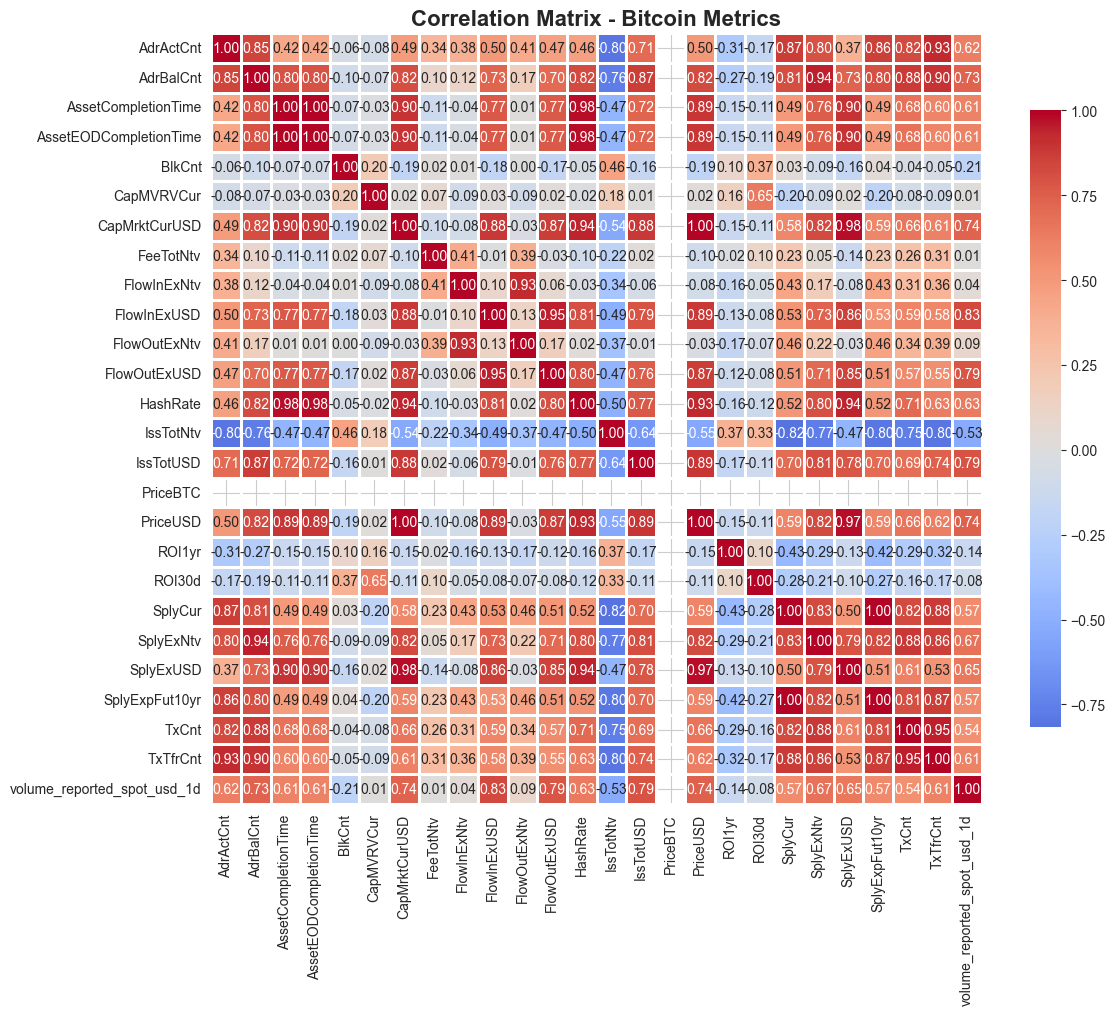

In [4]:
# Select only numeric columns for correlation analysis
numeric_cols = btc_pd.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = btc_pd[numeric_cols].corr()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Bitcoin Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Analysis Result Interpretation:**
- **Correlation Coefficient Interpretation**:
  - **1.0**: Perfect positive correlation (move together)
  - **-1.0**: Perfect negative correlation (move opposite)
  - **0.0**: No correlation
- **Key Insights**:
  - Metrics showing high positive correlation move similarly, so redundancy should be considered
  - Metrics showing negative correlation provide opposite directional information
  - On-chain indicators with strong positive correlation to price can be used in predictive models
  - Some variables can be removed to prevent multicollinearity (multicollinearity) issues

In [9]:
btc_df.columns

['date',
 'AdrActCnt',
 'AdrBalCnt',
 'AssetCompletionTime',
 'AssetEODCompletionTime',
 'BlkCnt',
 'CapMVRVCur',
 'CapMrktCurUSD',
 'CapMrktEstUSD',
 'FeeTotNtv',
 'FlowInExNtv',
 'FlowInExUSD',
 'FlowOutExNtv',
 'FlowOutExUSD',
 'HashRate',
 'IssTotNtv',
 'IssTotUSD',
 'PriceBTC',
 'PriceUSD',
 'ROI1yr',
 'ROI30d',
 'ReferenceRate',
 'ReferenceRateETH',
 'ReferenceRateEUR',
 'ReferenceRateUSD',
 'SplyCur',
 'SplyExNtv',
 'SplyExUSD',
 'SplyExpFut10yr',
 'TxCnt',
 'TxTfrCnt',
 'volume_reported_spot_usd_1d']

## 5. Returns Analysis

C:\Users\jupark\AppData\Local\Temp\ipykernel_8244\1656024876.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  btc_pd['daily_return'] = btc_pd['PriceUSD'].pct_change() * 100


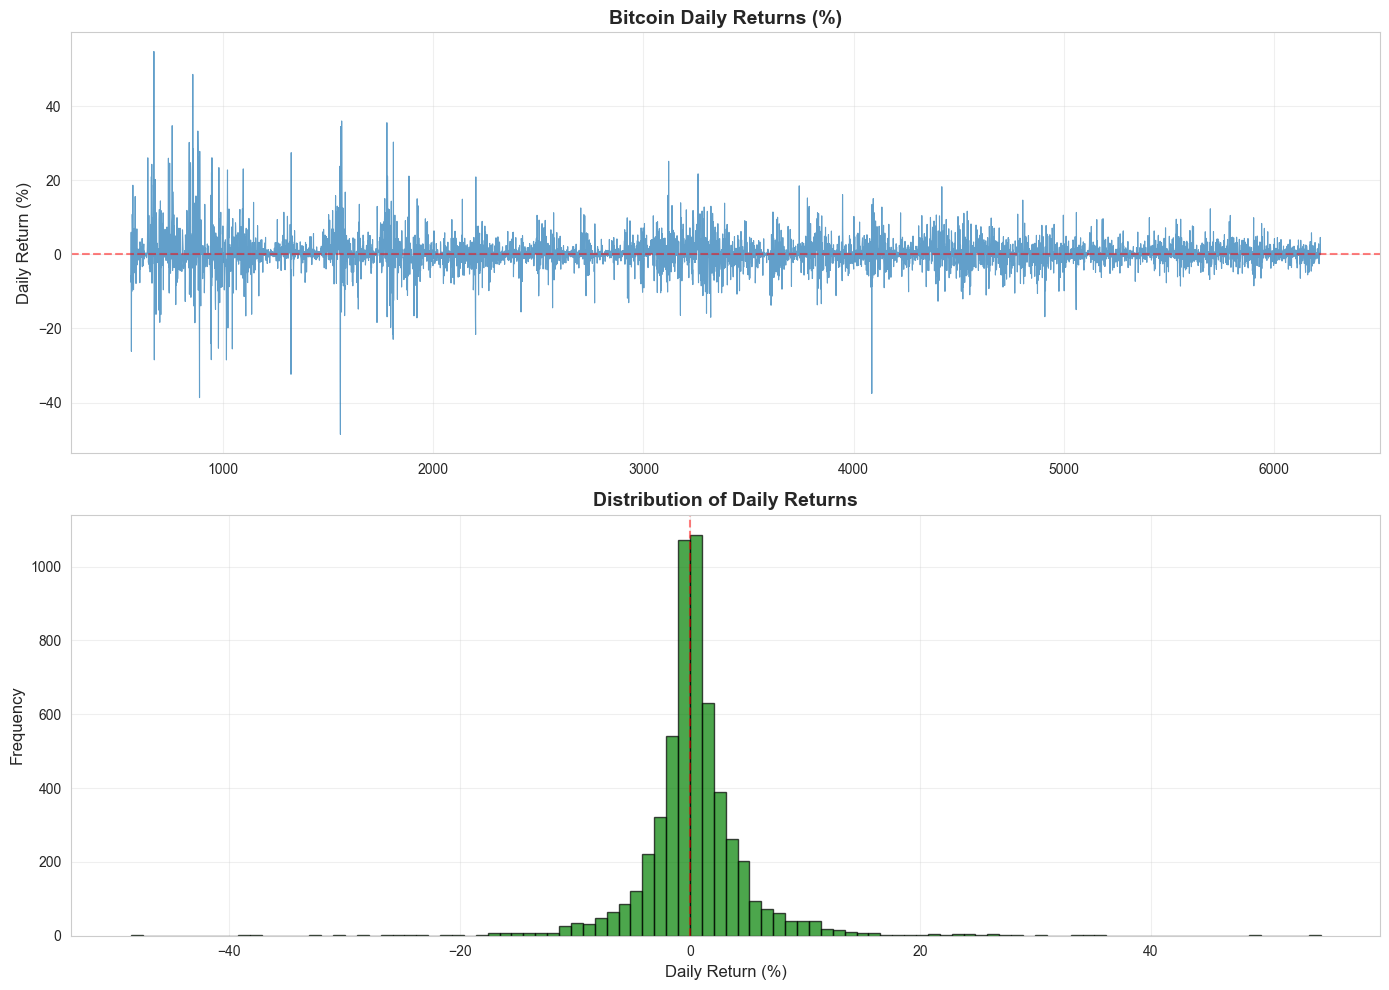


Daily Returns Statistics:
Mean: 0.3574%
Std Dev: 4.7217%
Max: 54.7523%
Min: -48.5699%


In [11]:
# Calculate daily returns
btc_pd['daily_return'] = btc_pd['PriceUSD'].pct_change() * 100

# Visualize returns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Daily returns time series
axes[0].plot(btc_pd.index, btc_pd['daily_return'], linewidth=0.8, alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0].set_title('Bitcoin Daily Returns (%)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Daily Return (%)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Returns distribution
axes[1].hist(btc_pd['daily_return'].dropna(), bins=100, color='green', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Daily Return (%)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].axvline(x=0, color='r', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Returns statistics
print("\nDaily Returns Statistics:")
print(f"Mean: {btc_pd['daily_return'].mean():.4f}%")
print(f"Std Dev: {btc_pd['daily_return'].std():.4f}%")
print(f"Max: {btc_pd['daily_return'].max():.4f}%")
print(f"Min: {btc_pd['daily_return'].min():.4f}%")

**Analysis Result Interpretation:**
- **Daily Returns Time Series**:
  - Shows large fluctuations around zero
  - Extreme rises/falls occurred during specific periods
  - Volatility clustering pattern (volatility changes over time) can be observed
- **Returns Distribution**:
  - Generally resembles a normal distribution but has fat-tailed characteristics
  - This means extreme returns occur more frequently than normal distribution predicts
- **Statistical Summary**:
  - **Mean Return**: Indicates long-term return tendency (positive = uptrend)
  - **Standard Deviation**: Risk/volatility measure (higher = more unstable)
  - **Max/Min Values**: Show the magnitude of extreme market events
- **Investment Perspective**: High volatility means both high risk and high return opportunities

## 6. Detailed Analysis by Column

Analyze each column to identify features useful for modeling.

### 6.1 MVRV & NVT: Network Valuation Indicators

Core indicators for measuring whether Bitcoin is overvalued or undervalued relative to network fundamentals.

In [12]:
# MVRV and NVT analysis (Network Valuation Indicators)
valuation_metrics = ['CapMVRVCur', 'NVTAdj']
available_valuation = [col for col in valuation_metrics if col in btc_df.columns]

if available_valuation:
    print("=== On-Chain Valuation Indicators ===\n")
    
    # MVRV (Market Value to Realized Value)
    if 'CapMVRVCur' in btc_pd.columns:
        mvrv = btc_pd['CapMVRVCur'].dropna()
        print("[SUMMARY] MVRV (Market Value to Realized Value)")
        print(f"  - Mean: {mvrv.mean():.2f}")
        print(f"  - Median: {mvrv.median():.2f}")
        print(f"  - Max: {mvrv.max():.2f} (historical peak)")
        print(f"  - Min: {mvrv.min():.2f} (historical low)")
        print(f"  - Days with MVRV > 3.5: {(mvrv > 3.5).sum()} (overheated period)")
        print(f"  - Days with MVRV < 1.0: {(mvrv < 1.0).sum()} (oversold period)")
        print(f"  - Interpretation: MVRV > 3.5 = Overvalued, MVRV < 1.0 = Undervalued")
    
    # NVT (Network Value to Transactions)
    if 'NVTAdj' in btc_pd.columns:
        nvt = btc_pd['NVTAdj'].dropna()
        print("[SUMMARY] NVT Adjusted (Network Value to Transactions)")
        print(f"  - Mean: {nvt.mean():.2f}")
        print(f"  - Median: {nvt.median():.2f}")
        print(f"  - Days with NVT > 100: {(nvt > 100).sum()} (network overvalued)")
        print(f"  - Days with NVT < 50: {(nvt < 50).sum()} (network undervalued)")
        print(f"  - Interpretation: Higher NVT = Price high relative to transaction volume (bubble risk)")
else:
    print("Valuation indicators not found.")

=== On-Chain Valuation Indicators ===

[SUMMARY] MVRV (Market Value to Realized Value)
  - Mean: 1.99
  - Median: 1.75
  - Max: 146.04 (historical peak)
  - Min: 0.39 (historical low)
  - Days with MVRV > 3.5: 334 (overheated period)
  - Days with MVRV < 1.0: 775 (oversold period)
  - Interpretation: MVRV > 3.5 = Overvalued, MVRV < 1.0 = Undervalued


### 6.2 Network Activity & Security Indicators

Core indicators for measuring actual network usage, adoption, and security strength.

In [13]:
# Active addresses, hash rate, transaction volume analysis
activity_metrics = ['AdrActCnt', 'HashRate', 'TxTfrValAdjUSD']
available_activity = [col for col in activity_metrics if col in btc_df.columns]

if available_activity:
    print("=== Network Activity & Security Indicators ===\n")
    
    # Active Addresses
    if 'AdrActCnt' in btc_pd.columns:
        addr_count = btc_pd['AdrActCnt'].dropna()
        print("[SUMMARY] Active Address Count (AdrActCnt)")
        print(f"  - Daily Average: {addr_count.mean():,.0f} addresses")
        print(f"  - Daily Max: {addr_count.max():,.0f} addresses")
        print(f"  - Last 30-Day Average: {addr_count.iloc[-30:].mean():,.0f} addresses")
        print(f"  - Interpretation: More active addresses = More network participants = Growing adoption")
    
    # Hash Rate
    if 'HashRate' in btc_pd.columns:
        hashrate = btc_pd['HashRate'].dropna()
        print("[SUMMARY] Hash Rate (HashRate)")
        print(f"  - Mean: {hashrate.mean()/1e6:.2f} EH/s (ExaHashes per second)")
        print(f"  - Max: {hashrate.max()/1e6:.2f} EH/s")
        print(f"  - Current: {hashrate.iloc[-1]/1e6:.2f} EH/s")
        print(f"  - Interpretation: Increasing hash rate = Network security strengthens = Miner confidence")

else:
    print("Network activity indicators not found.")

=== Network Activity & Security Indicators ===

[SUMMARY] Active Address Count (AdrActCnt)
  - Daily Average: 500,906 addresses
  - Daily Max: 1,366,494 addresses
  - Last 30-Day Average: 649,196 addresses
  - Interpretation: More active addresses = More network participants = Growing adoption
[SUMMARY] Hash Rate (HashRate)
  - Mean: 151.46 EH/s (ExaHashes per second)
  - Max: 1305.50 EH/s
  - Current: 982.96 EH/s
  - Interpretation: Increasing hash rate = Network security strengthens = Miner confidence


### 6.3 Exchange Flows: BTC Supply/Demand Signals

Key indicator for measuring buying/selling pressure through exchange capital movements.

In [14]:
# Exchange inflow/outflow analysis (BTC-based flows)
exchange_metrics = ['FlowInExNtv', 'FlowOutExNtv']
available_exchange = [col for col in exchange_metrics if col in btc_df.columns]

if available_exchange:
    print("=== Exchange Flow Analysis (BTC) ===\n")
    
    if 'FlowInExNtv' in btc_pd.columns and 'FlowOutExNtv' in btc_pd.columns:
        flow_in = btc_pd['FlowInExNtv'].dropna()
        flow_out = btc_pd['FlowOutExNtv'].dropna()
        net_flow = flow_in - flow_out
        
        print("[SUMMARY] Exchange Flow (BTC)")
        print(f"  - Average Inflow: {flow_in.mean():,.2f} BTC/day")
        print(f"  - Average Outflow: {flow_out.mean():,.2f} BTC/day")
        print(f"  - Average Net Flow: {net_flow.mean():,.2f} BTC/day")
        print(f"  - Net Inflow (+) Days: {(net_flow > 0).sum()} days")
        print(f"  - Net Outflow (-) Days: {(net_flow < 0).sum()} days")
        print("\n   Interpretation:")
        print("    - Net Inflow (+) = Coming into exchange = Selling pressure increasing (bearish)")
        print("    - Net Outflow (-) = Leaving exchange = HODL behavior increasing (bullish)")
else:
    print("Exchange flow data not found.")

=== Exchange Flow Analysis (BTC) ===

[SUMMARY] Exchange Flow (BTC)
  - Average Inflow: 25,838.96 BTC/day
  - Average Outflow: 26,577.13 BTC/day
  - Average Net Flow: -738.17 BTC/day
  - Net Inflow (+) Days: 2496 days
  - Net Outflow (-) Days: 2870 days

   Interpretation:
    - Net Inflow (+) = Coming into exchange = Selling pressure increasing (bearish)
    - Net Outflow (-) = Leaving exchange = HODL behavior increasing (bullish)


### 6.4 Quick Data Overview

Summary of available columns and data shape before detailed analysis.

In [15]:
btc_filtered = btc_pd.copy()

print(f"Total data: {len(btc_pd)} days")
print(f"Date range: {btc_filtered.index.min()} ~ {btc_filtered.index.max()}")
print(f"Includes all 4 halving cycles (2012, 2016, 2020, 2024)")

# Define columns to plot
columns_to_plot = {
    "Price Indicators": ['PriceUSD'],
    "Valuation": ['CapMVRVCur'],
    "Returns": ['ROI30d', 'ROI1yr'],
    "Exchange Flows": ['FlowInExNtv', 'FlowOutExNtv'],
    "Network Security": ['HashRate'],
    "Network Activity": ['AdrActCnt', 'TxCnt'],
    "Supply": ['SplyCur', 'SplyExNtv'],
    "Fees": ['FeeTotNtv'],
}

# Filter only available columns
available_plots = {}
for category, cols in columns_to_plot.items():
    available_cols = [col for col in cols if col in btc_filtered.columns and btc_filtered[col].notna().sum() > 100]
    if available_cols:
        available_plots[category] = available_cols

print(f"\nAvailable categories for visualization: {len(available_plots)}")
for cat, cols in available_plots.items():
    print(f"  - {cat}: {', '.join(cols)}")

Total data: 6221 days
Date range: 0 ~ 6220
Includes all 4 halving cycles (2012, 2016, 2020, 2024)

Available categories for visualization: 8
  - Price Indicators: PriceUSD
  - Valuation: CapMVRVCur
  - Returns: ROI30d, ROI1yr
  - Exchange Flows: FlowInExNtv, FlowOutExNtv
  - Network Security: HashRate
  - Network Activity: AdrActCnt, TxCnt
  - Supply: SplyCur, SplyExNtv
  - Fees: FeeTotNtv


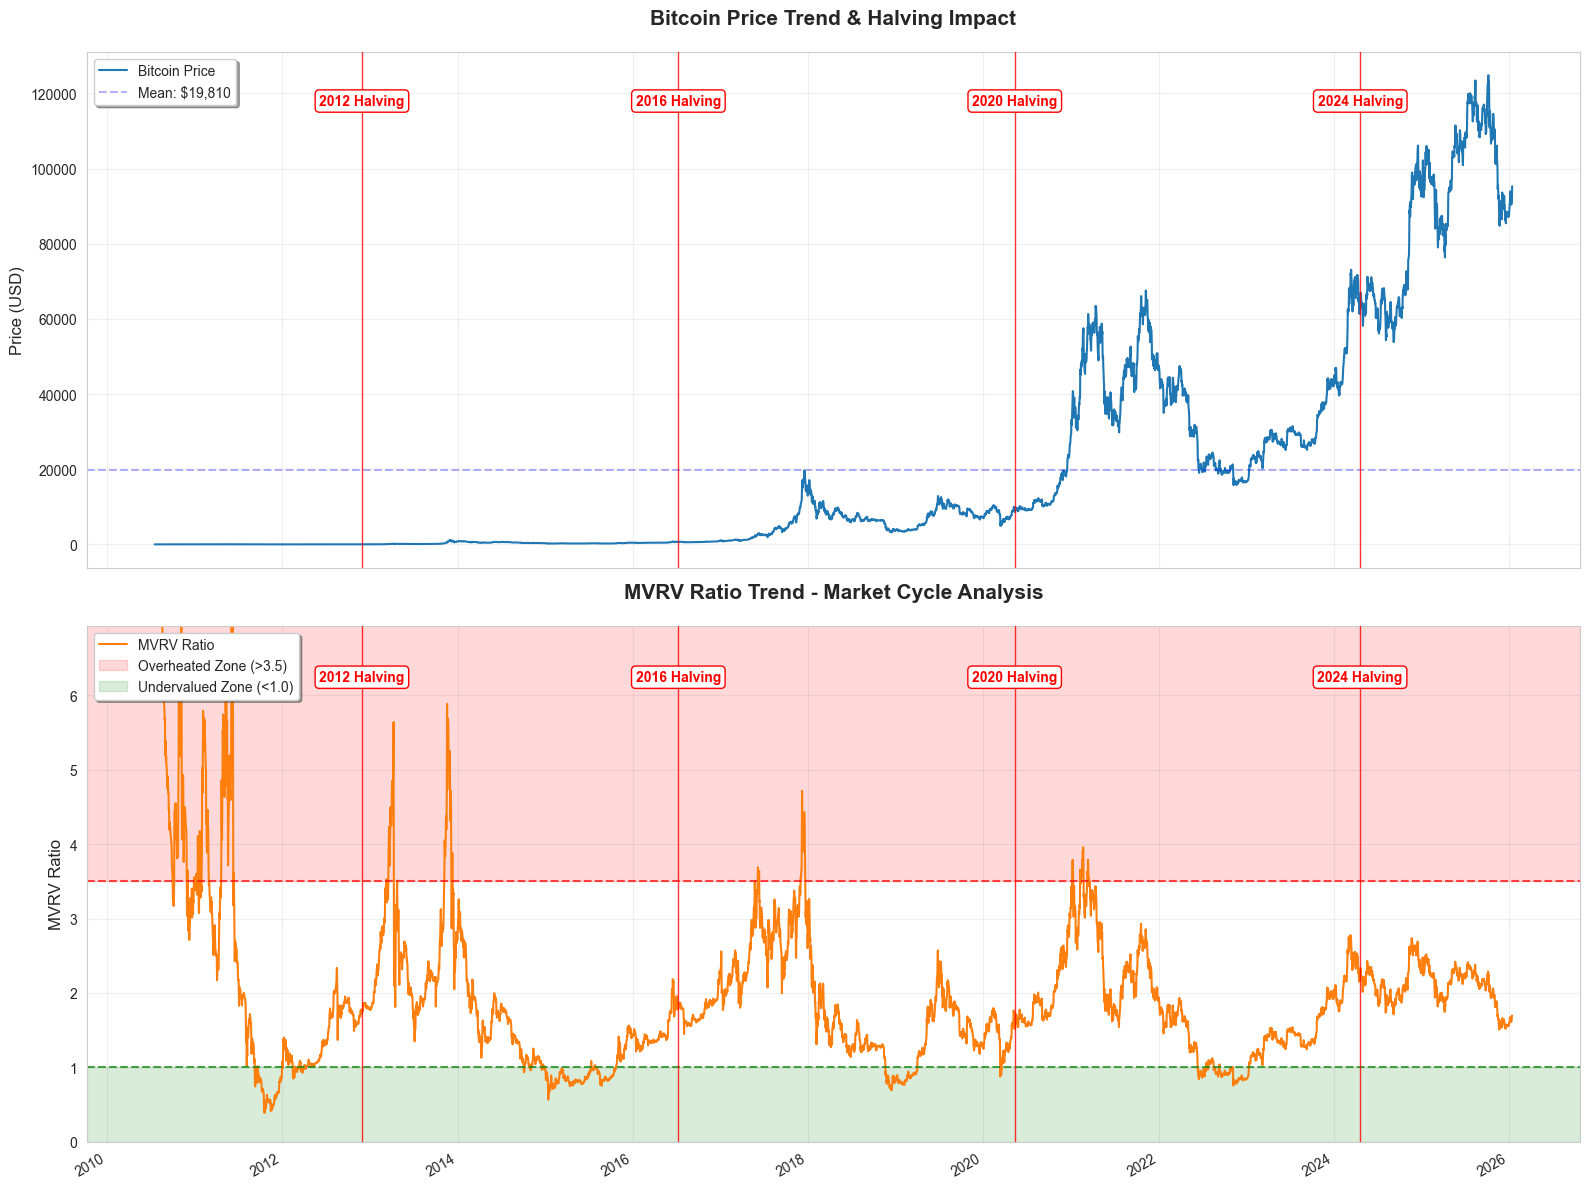

In [16]:
# Price and valuation chart
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Define Bitcoin Halving Dates
halving_dates = {
    '2012': '2012-11-28',
    '2016': '2016-07-09',
    '2020': '2020-05-11',
    '2024': '2024-04-20'
}

# Bitcoin Market Price (PriceUSD) 
if 'PriceUSD' in btc_filtered.columns:
    ax = axes[0]
    ax.plot(btc_filtered['date'], btc_filtered['PriceUSD'], linewidth=1.5, color='#1f77b4', label='Bitcoin Price')
    ax.set_title('Bitcoin Price Trend & Halving Impact', fontsize=15, fontweight='bold', pad=20)
    ax.set_ylabel('Price (USD)', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Add Mean Price Line for reference
    price_mean = btc_filtered['PriceUSD'].mean()
    ax.axhline(y=price_mean, color='blue', linestyle='--', alpha=0.3, label=f'Mean: ${price_mean:,.0f}')

# Valuation Metric (CapMVRVCur)
if 'CapMVRVCur' in btc_filtered.columns:
    ax = axes[1]
    # Handle missing values using linear interpolation for a smoother curve
    mvrv_data = btc_filtered['CapMVRVCur'].interpolate(method='linear')
    
    ax.plot(btc_filtered['date'], mvrv_data, linewidth=1.5, color='#ff7f0e', label='MVRV Ratio')
    
    # Plot Threshold Lines: 3.5 (Overheated) and 1.0 (Undervalued)
    ax.axhline(y=3.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.axhline(y=1.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
    
    # Highlight Market Zones
    ax.axhspan(3.5, max(4.5, mvrv_data.max()), alpha=0.15, color='red', label='Overheated Zone (>3.5)')
    ax.axhspan(0, 1.0, alpha=0.15, color='green', label='Undervalued Zone (<1.0)')
    
    ax.set_title('MVRV Ratio Trend - Market Cycle Analysis', fontsize=15, fontweight='bold', pad=20)
    ax.set_ylabel('MVRV Ratio', fontsize=12)
    
    # Optimize Y-axis range based on historical volatility
    mvrv_hi = max(4.5, mvrv_data.quantile(0.99) * 1.2)
    ax.set_ylim(0, mvrv_hi)
    ax.grid(True, alpha=0.3)

# Add Halving Lines & Labels
for ax in axes:
    for year, date_str in halving_dates.items():
        h_date = pd.to_datetime(date_str)
        
        # Display only if the halving date falls within the data range
        if btc_filtered['date'].min() <= h_date <= btc_filtered['date'].max():
            ax.axvline(x=h_date, color='red', linestyle='-', linewidth=1.0, alpha=0.8, zorder=10)
            y_min, y_max = ax.get_ylim()
            text_y = y_max * 0.9  
            
            ax.text(h_date, text_y, f'{year} Halving', 
                    color='red', fontsize=10, fontweight='bold',
                    ha='center', va='center', zorder=11,
                    bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3', alpha=1.0))
    
    ax.legend(loc='upper left', frameon=True, shadow=True)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

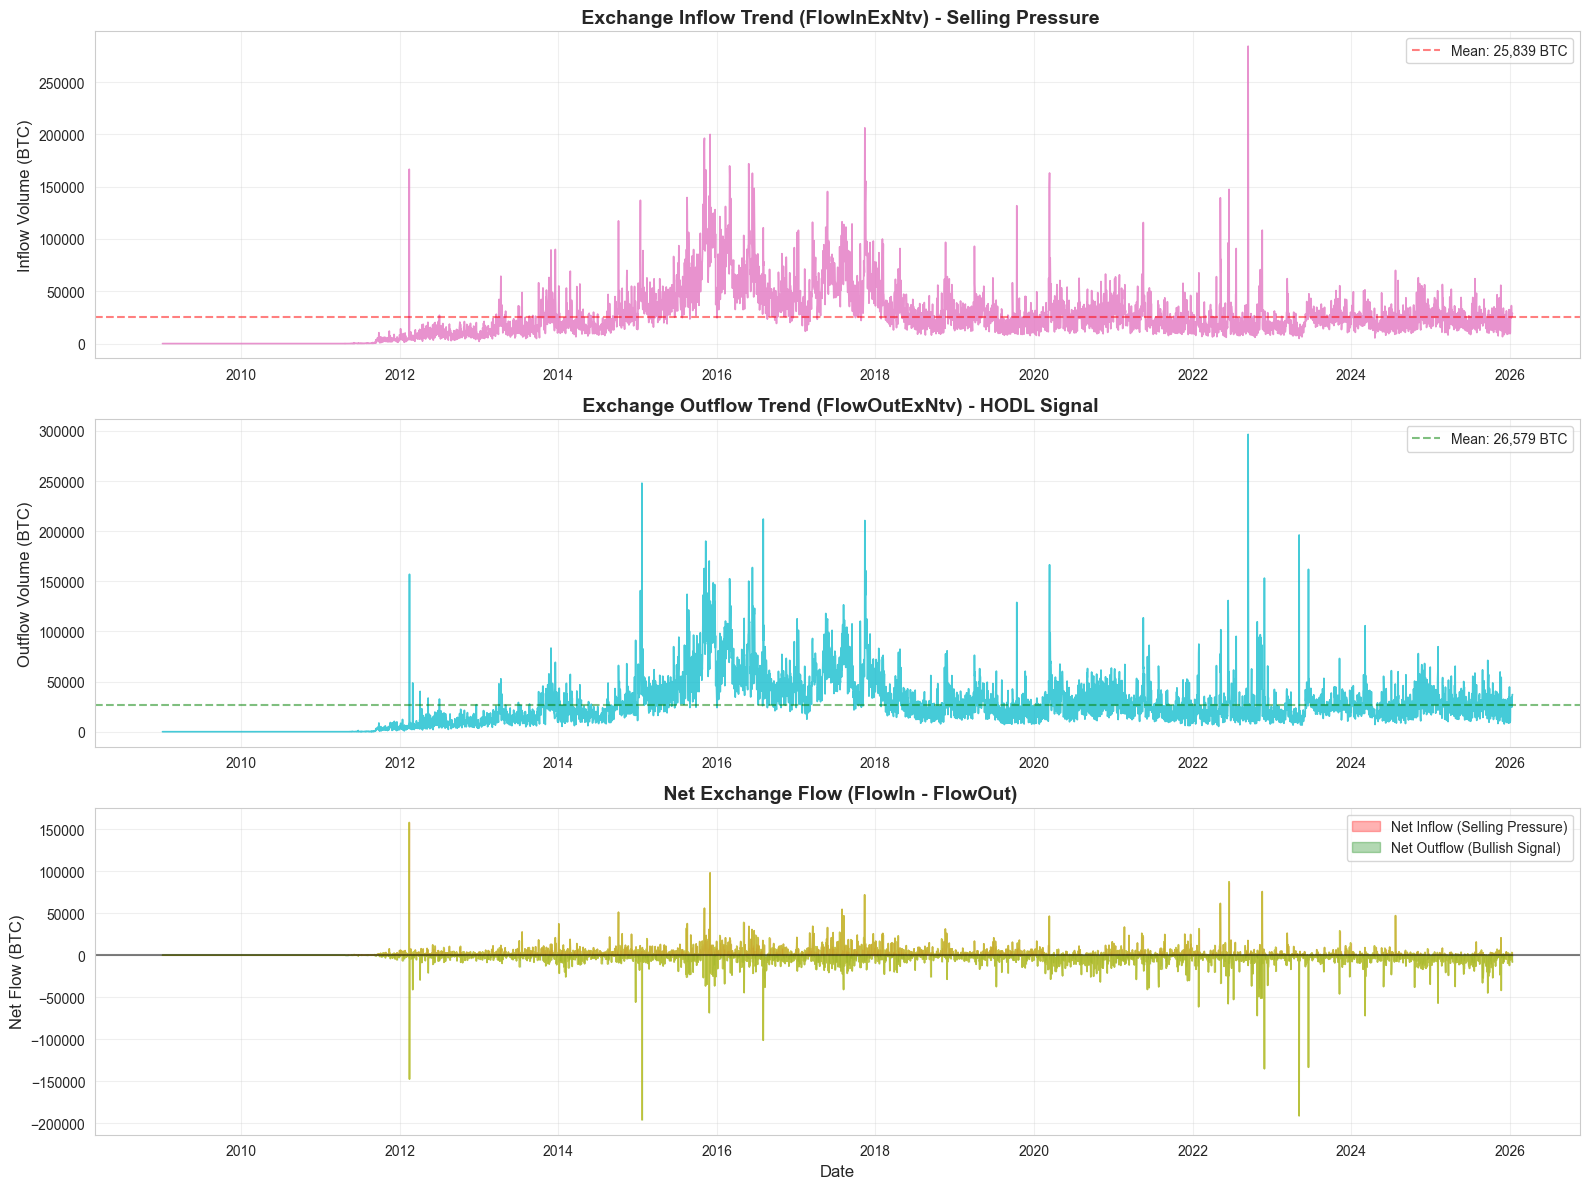

In [17]:
# Exchange flows (selling/buying pressure)
if 'FlowInExNtv' in btc_filtered.columns and 'FlowOutExNtv' in btc_filtered.columns:
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    
    # FlowInExNtv (exchange inflow)
    ax = axes[0]
    btc_filtered['FlowInExNtv'] = btc_filtered['FlowInExNtv'].interpolate(method='linear')  
    ax.plot(btc_filtered['date'], btc_filtered['FlowInExNtv'], linewidth=1.2, color='#e377c2', alpha=0.8)
    ax.set_title(' Exchange Inflow Trend (FlowInExNtv) - Selling Pressure', fontsize=14, fontweight='bold')
    ax.set_ylabel('Inflow Volume (BTC)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=btc_filtered['FlowInExNtv'].mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean: {btc_filtered["FlowInExNtv"].mean():,.0f} BTC')
    ax.legend()
    
    # FlowOutExNtv (exchange outflow)
    ax = axes[1]
    btc_filtered['FlowOutExNtv'] = btc_filtered['FlowOutExNtv'].interpolate(method='linear')
    ax.plot(btc_filtered['date'], btc_filtered['FlowOutExNtv'], linewidth=1.2, color='#17becf', alpha=0.8)
    ax.set_title(' Exchange Outflow Trend (FlowOutExNtv) - HODL Signal', fontsize=14, fontweight='bold')
    ax.set_ylabel('Outflow Volume (BTC)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=btc_filtered['FlowOutExNtv'].mean(), color='green', linestyle='--', alpha=0.5, label=f'Mean: {btc_filtered["FlowOutExNtv"].mean():,.0f} BTC')
    ax.legend()
    
    # Net Flow
    ax = axes[2]
    net_flow = btc_filtered['FlowInExNtv'] - btc_filtered['FlowOutExNtv']
    ax.plot(btc_filtered['date'], net_flow, linewidth=1.2, color='#bcbd22', alpha=0.8)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax.fill_between(btc_filtered['date'], 0, net_flow, where=(net_flow > 0), alpha=0.3, color='red', label='Net Inflow (Selling Pressure)')
    ax.fill_between(btc_filtered['date'], 0, net_flow, where=(net_flow <= 0), alpha=0.3, color='green', label='Net Outflow (Bullish Signal)')
    ax.set_title(' Net Exchange Flow (FlowIn - FlowOut)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Net Flow (BTC)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("Exchange flow data not available.")

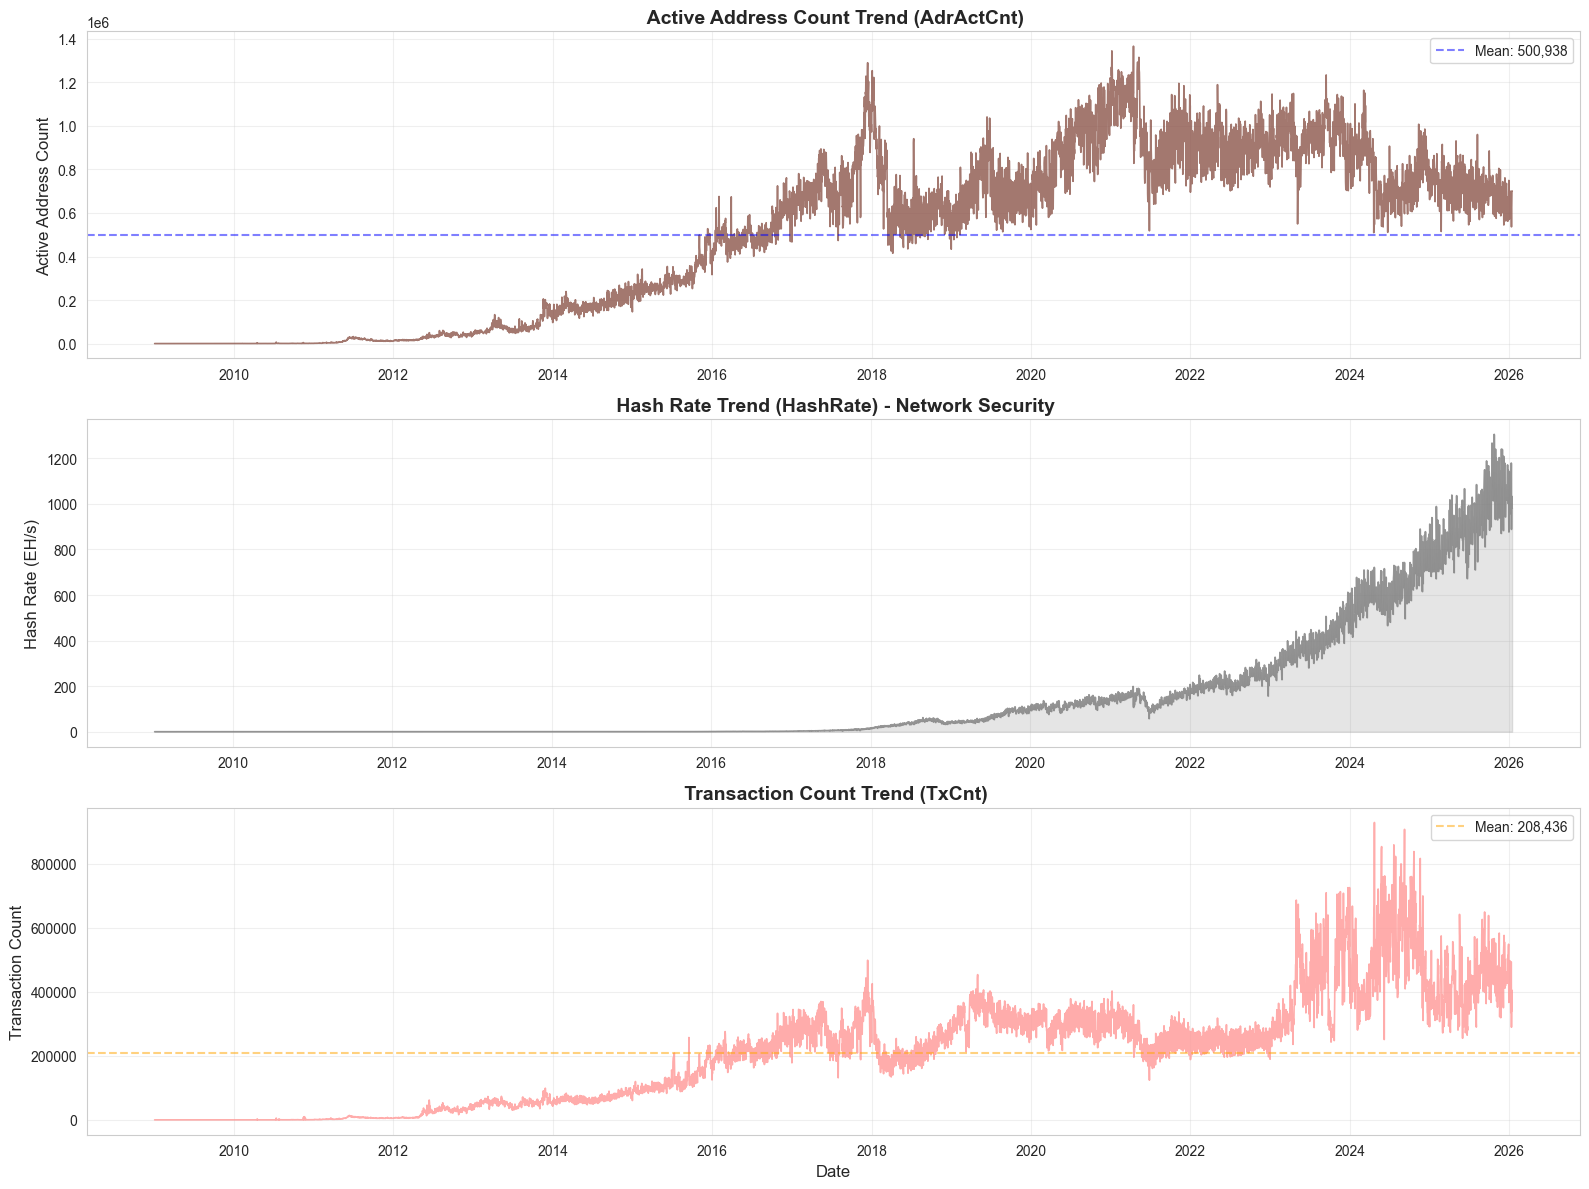

In [18]:
# Network indicators (activity and security)
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# AdrActCnt (active address count)
if 'AdrActCnt' in btc_filtered.columns:
    ax = axes[0]
    btc_filtered['AdrActCnt'] = btc_filtered['AdrActCnt'].interpolate(method='linear')
    ax.plot(btc_filtered['date'], btc_filtered['AdrActCnt'], linewidth=1.2, color='#8c564b', alpha=0.8)
    ax.set_title(' Active Address Count Trend (AdrActCnt)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Active Address Count', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=btc_filtered['AdrActCnt'].mean(), color='blue', linestyle='--', alpha=0.5, label=f'Mean: {btc_filtered["AdrActCnt"].mean():,.0f}')
    ax.legend()

# HashRate
if 'HashRate' in btc_filtered.columns:
    ax = axes[1]
    btc_filtered['HashRate'] = btc_filtered['HashRate'].interpolate(method='linear') / 1e6  # Convert to EH/s
    ax.plot(btc_filtered['date'], btc_filtered['HashRate'], linewidth=1.2, color='#7f7f7f', alpha=0.8)
    ax.set_title(' Hash Rate Trend (HashRate) - Network Security', fontsize=14, fontweight='bold')
    ax.set_ylabel('Hash Rate (EH/s)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.fill_between(btc_filtered['date'], 0, btc_filtered['HashRate'], alpha=0.2, color='gray')

# TxCnt (transaction count)
if 'TxCnt' in btc_filtered.columns:
    ax = axes[2]
    btc_filtered['TxCnt'] = btc_filtered['TxCnt'].interpolate(method='linear')
    ax.plot(btc_filtered['date'], btc_filtered['TxCnt'], linewidth=1.2, color='#ff9896', alpha=0.8)
    ax.set_title(' Transaction Count Trend (TxCnt)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Transaction Count', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=btc_filtered['TxCnt'].mean(), color='orange', linestyle='--', alpha=0.5, label=f'Mean: {btc_filtered["TxCnt"].mean():,.0f}')
    ax.legend()

plt.tight_layout()
plt.show()

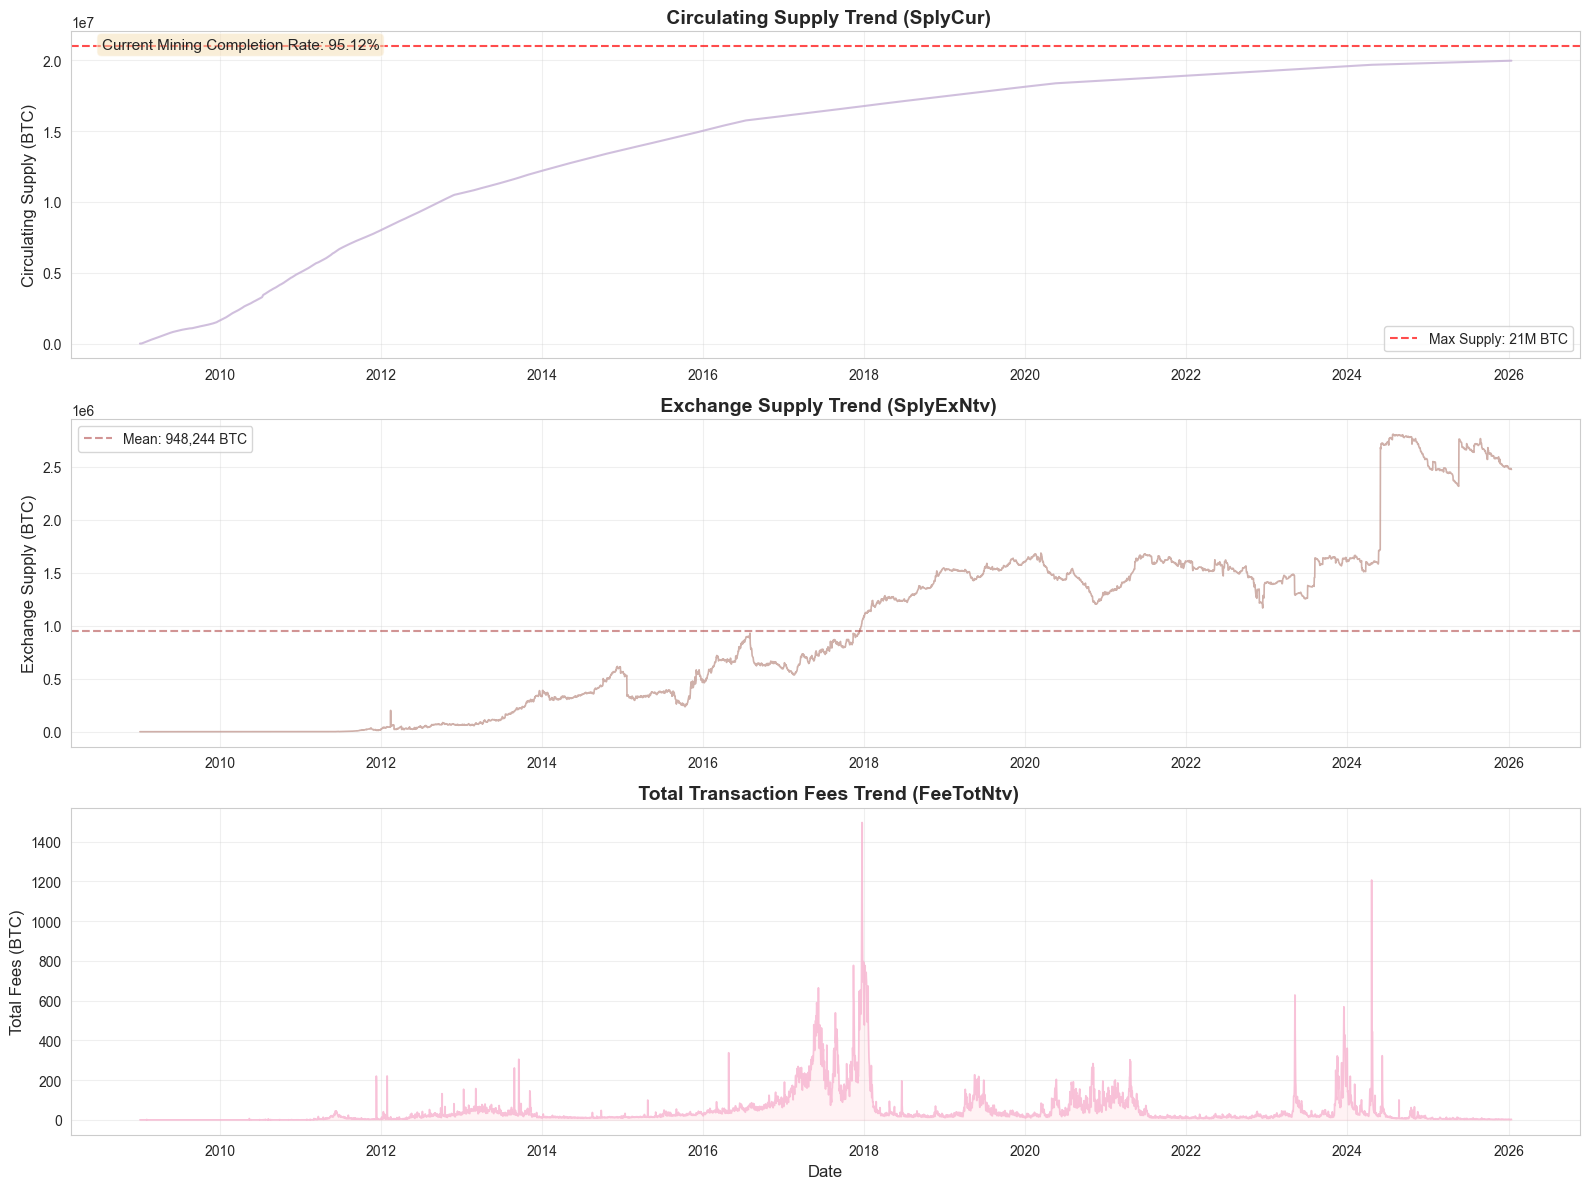

In [19]:
# Supply indicators
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# SplyCur (circulating supply)
if 'SplyCur' in btc_filtered.columns:
    ax = axes[0]
    btc_filtered['SplyCur'] = btc_filtered['SplyCur'].interpolate(method='linear')
    ax.plot(btc_filtered['date'], btc_filtered['SplyCur'], linewidth=1.5, color='#c5b0d5', alpha=0.8)
    ax.axhline(y=21_000_000, color='red', linestyle='--', alpha=0.7, label='Max Supply: 21M BTC')
    ax.set_title(' Circulating Supply Trend (SplyCur)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Circulating Supply (BTC)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()
    # Show mining completion rate
    completion = (btc_filtered['SplyCur'].iloc[-1] / 21_000_000) * 100
    ax.text(0.02, 0.98, f'Current Mining Completion Rate: {completion:.2f}%', 
            transform=ax.transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# SplyExNtv (exchange supply)
if 'SplyExNtv' in btc_filtered.columns:
    ax = axes[1]
    btc_filtered['SplyExNtv'] = btc_filtered['SplyExNtv'].interpolate(method='linear')
    ax.plot(btc_filtered['date'], btc_filtered['SplyExNtv'], linewidth=1.2, color='#c49c94', alpha=0.8)
    ax.set_title(' Exchange Supply Trend (SplyExNtv)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Exchange Supply (BTC)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=btc_filtered['SplyExNtv'].mean(), color='brown', linestyle='--', alpha=0.5, label=f'Mean: {btc_filtered["SplyExNtv"].mean():,.0f} BTC')
    ax.legend()

# FeeTotNtv (total fees)
if 'FeeTotNtv' in btc_filtered.columns:
    ax = axes[2]
    btc_filtered['FeeTotNtv'] = btc_filtered['FeeTotNtv'].interpolate(method='linear')
    ax.plot(btc_filtered['date'], btc_filtered['FeeTotNtv'], linewidth=1.2, color='#f7b6d2', alpha=0.8)
    ax.set_title(' Total Transaction Fees Trend (FeeTotNtv)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Total Fees (BTC)', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.fill_between(btc_filtered['date'], 0, btc_filtered['FeeTotNtv'], alpha=0.2, color='pink')

plt.tight_layout()
plt.show()

## 7. Feature Engineering & Signal Analysis

Constructing meaningful features from on-chain metrics for trend and sentiment analysis.

### 7.1 Time Series Visualization

Detailed trend analysis of price, valuation, exchange flows, and network indicators across all halving cycles.

**Visualizations:**
- Price & MVRV trends with halving dates
- Exchange inflows/outflows (buy/sell pressure)
- Network activity (active addresses, hash rate, transactions)
- Supply metrics (circulating supply, exchange reserves, fees)

### 7.2 200-Day Moving Average (Price Trend Regime)

Long-term trend regime detection based on price deviation from 200-day moving average.

*(`log_price - log_ma200` → positive = uptrend, negative = downtrend)*

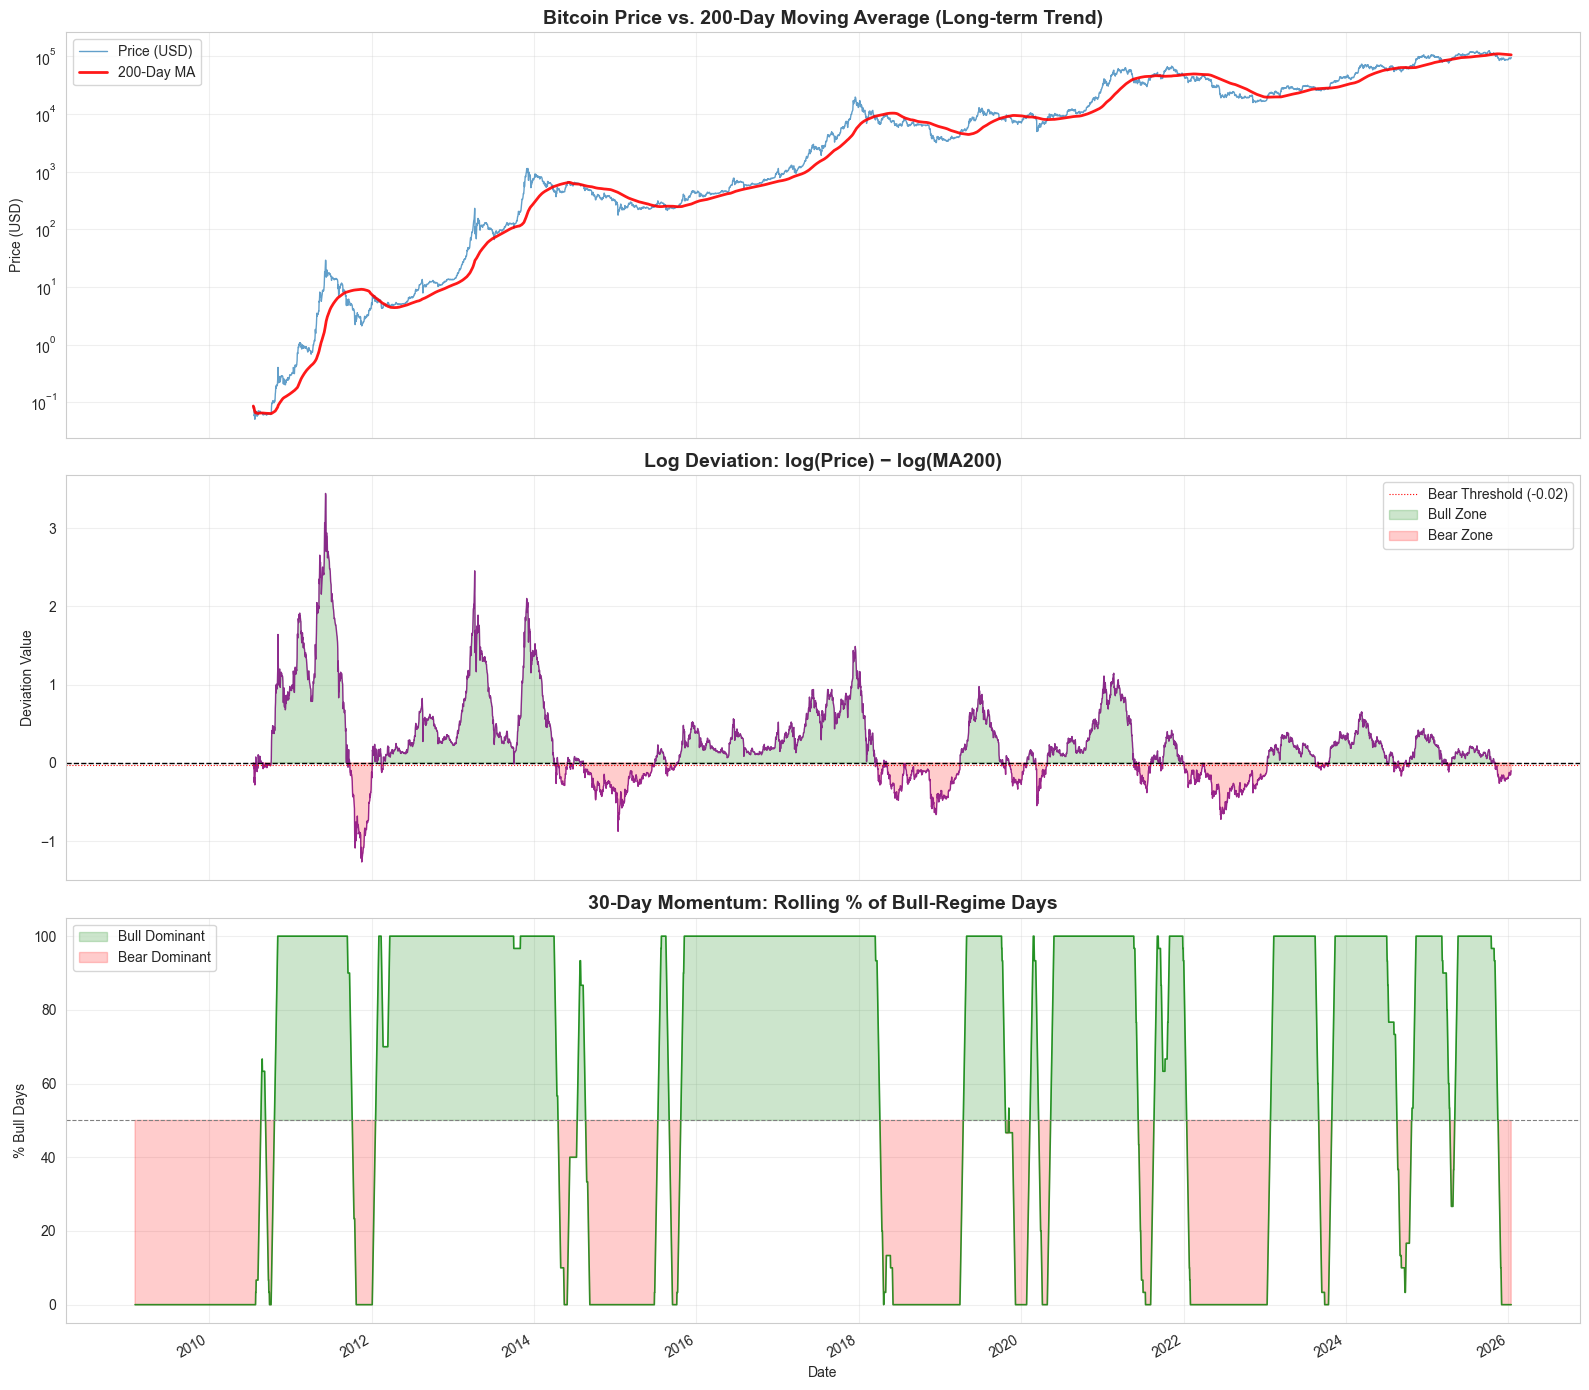


=== Market Regime Distribution (Full Dataset) ===
Bull Days  (Trend > 0):       3826 days ( 61.5%)
Side Days  (-0.02 < T ≤ 0):    670 days ( 10.8%)
Bear Days  (Trend ≤ -0.02):   1725 days ( 27.7%)


In [20]:
# 200-day MA trend analysis 
if 'PriceUSD' in btc_filtered.columns:
    # 1. Handle missing values and ensure datetime format
    btc_filtered['date'] = pd.to_datetime(btc_filtered['date'])
    btc_filtered['PriceUSD'] = btc_filtered['PriceUSD'].interpolate(method='linear')
    
    # 2. Log-transformation and MA calculation
    # Using log-scale helps normalize high volatility for trend analysis
    log_price = np.log(btc_filtered['PriceUSD'])
    log_ma200 = log_price.rolling(window=200, min_periods=1).mean()
    
    # 3. Calculate Trend Signal (Positive = Bullish, Negative = Bearish)
    # This represents the % deviation from the long-term mean in log space
    trend = log_price - log_ma200 
    
    # 4. Define Regimes (Adding to dataframe to keep index aligned)
    btc_filtered['trend_signal'] = trend
    
    fig, axes = plt.subplots(3, 1, figsize=(16, 14), sharex=True)

    # Subplot 1: Price + 200-day Moving Average
    ax = axes[0]
    ma200 = btc_filtered['PriceUSD'].rolling(window=200, min_periods=1).mean()
    ax.plot(btc_filtered['date'], btc_filtered['PriceUSD'], linewidth=1.0, label='Price (USD)', alpha=0.7)
    ax.plot(btc_filtered['date'], ma200, linewidth=2.0, color='red', label='200-Day MA', alpha=0.9)
    ax.set_title('Bitcoin Price vs. 200-Day Moving Average (Long-term Trend)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Price (USD)')
    ax.set_yscale('log')  # Log scale for better visualization of historical cycles
    ax.legend(); ax.grid(True, alpha=0.3)

    # Subplot 2: Log Deviation (The Trend Signal)
    ax = axes[1]
    # Drop NaNs for the area fill to prevent plotting issues
    valid_mask = btc_filtered['trend_signal'].notna()
    plot_date = btc_filtered.loc[valid_mask, 'date']
    plot_trend = btc_filtered.loc[valid_mask, 'trend_signal']

    ax.plot(plot_date, plot_trend, linewidth=1.0, color='purple', alpha=0.8)
    ax.axhline(0, color='black', linewidth=1.0, linestyle='--')
    ax.axhline(-0.02, color='red', linewidth=0.8, linestyle=':', label='Bear Threshold (-0.02)')
    
    # Highlight Bull/Bear Zones
    ax.fill_between(plot_date, 0, plot_trend, where=(plot_trend > 0), alpha=0.2, color='green', label='Bull Zone')
    ax.fill_between(plot_date, 0, plot_trend, where=(plot_trend <= -0.02), alpha=0.2, color='red', label='Bear Zone')
    
    ax.set_title('Log Deviation: log(Price) − log(MA200)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Deviation Value')
    ax.legend(); ax.grid(True, alpha=0.3)

    # Subplot 3: 30-Day Rolling Momentum (% of Bull Days)
    ax = axes[2]
    bull_binary = (btc_filtered['trend_signal'] > 0).astype(int)
    bull_roll_pct = bull_binary.rolling(window=30).mean() * 100
    
    ax.plot(btc_filtered['date'], bull_roll_pct, linewidth=1.2, color='green', alpha=0.8)
    ax.axhline(50, color='gray', linewidth=0.8, linestyle='--')
    ax.fill_between(btc_filtered['date'], 50, bull_roll_pct, 
                    where=(bull_roll_pct >= 50), alpha=0.2, color='green', label='Bull Dominant')
    ax.fill_between(btc_filtered['date'], 50, bull_roll_pct, 
                    where=(bull_roll_pct < 50), alpha=0.2, color='red', label='Bear Dominant')
    
    ax.set_title('30-Day Momentum: Rolling % of Bull-Regime Days', fontsize=14, fontweight='bold')
    ax.set_ylabel('% Bull Days'); ax.set_xlabel('Date')
    ax.legend(); ax.grid(True, alpha=0.3)

    # Final visual polish
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

    # --- Print Regime Distribution Statistics ---
    total_days = len(btc_filtered)
    bull_days = (btc_filtered['trend_signal'] > 0).sum()
    bear_days = (btc_filtered['trend_signal'] <= -0.02).sum()
    side_days = total_days - bull_days - bear_days
    
    print(f"\n=== Market Regime Distribution (Full Dataset) ===")
    print(f"Bull Days  (Trend > 0):      {bull_days:5d} days ({bull_days/total_days*100:5.1f}%)")
    print(f"Side Days  (-0.02 < T ≤ 0):  {side_days:5d} days ({side_days/total_days*100:5.1f}%)")
    print(f"Bear Days  (Trend ≤ -0.02):  {bear_days:5d} days ({bear_days/total_days*100:5.1f}%)")

### 7.3 Halving Event Proximity

Exponential proximity score to Bitcoin halving events and forward return analysis by proximity regime.

**Key Metrics:**
- Proximity decay: `score = exp(-|days_to_halving| / 180)` — distances reduce halving effect
- Regime classification: Far (>1yr), Near (6-12mo), Close (2-6mo), Halving (<2mo)
- Outcome: 90-day forward returns grouped by proximity to major halvings (2012, 2016, 2020, 2024)

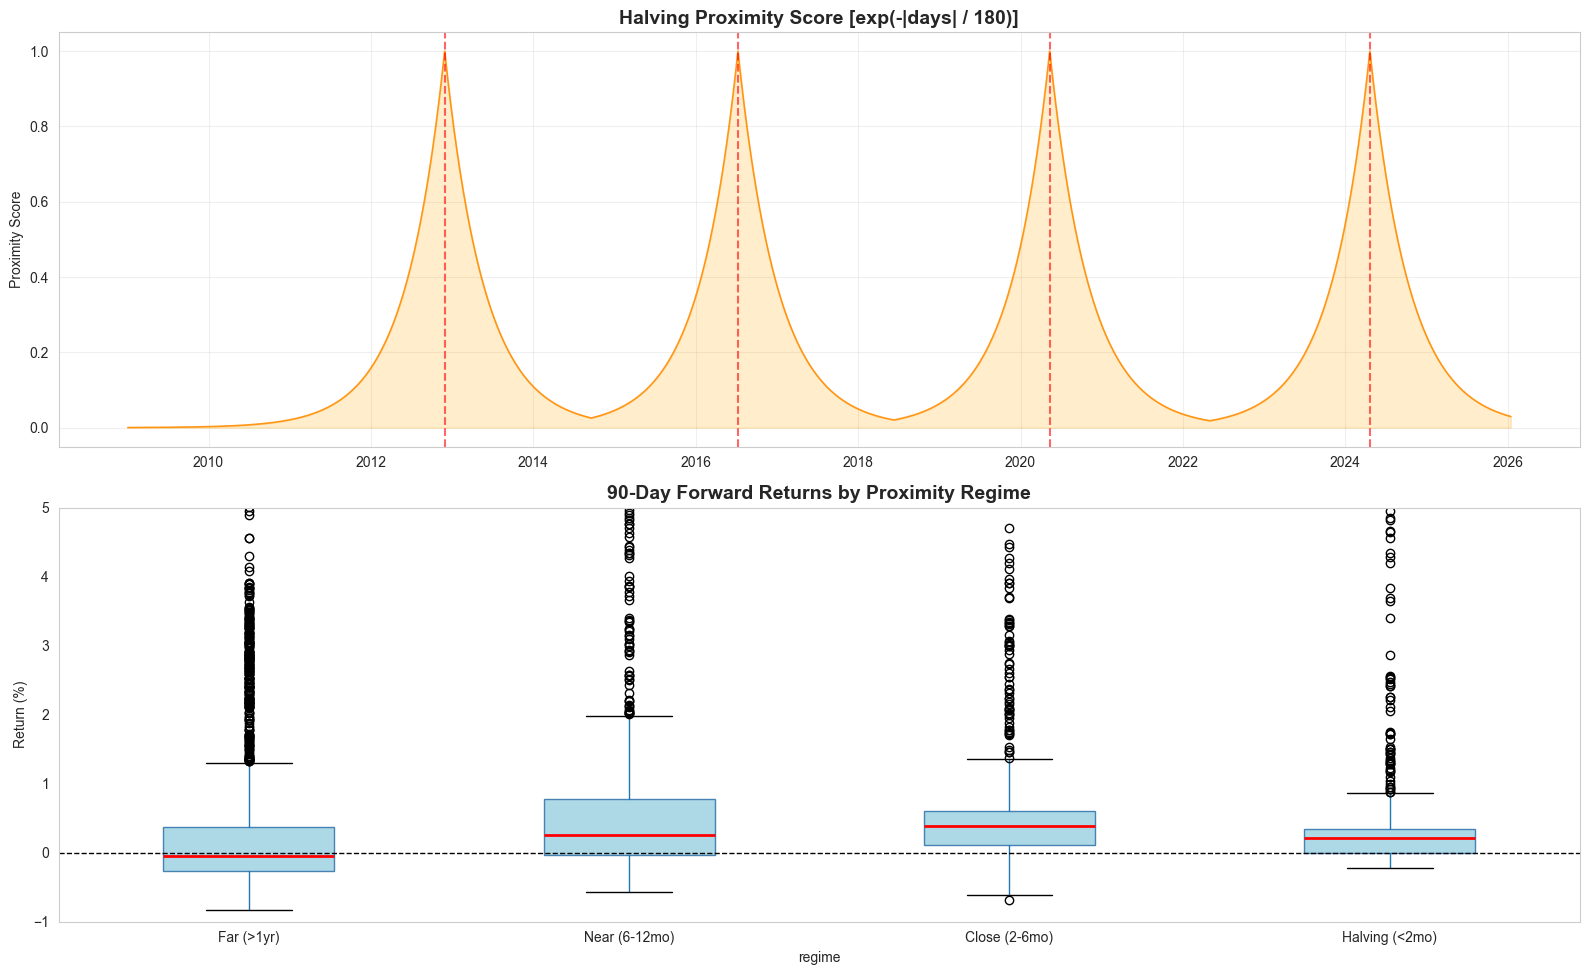


=== Halving Proximity & Performance Statistics ===
  2012 Halving Window:  61 days tracked | Avg 90d Fwd Return: +202.98%
  2016 Halving Window:  61 days tracked | Avg 90d Fwd Return: -2.05%
  2020 Halving Window:  61 days tracked | Avg 90d Fwd Return: +24.98%
  2024 Halving Window:  61 days tracked | Avg 90d Fwd Return: -5.49%


In [21]:
# Halving Event Proximity Analysis
btc_filtered['date'] = pd.to_datetime(btc_filtered['date'])

HALVING_DATES = pd.to_datetime([
    '2012-11-28', '2016-07-09', '2020-05-11', '2024-04-20'
])

# Use the 'date' column for calculations to avoid index-related errors
dates_series = btc_filtered['date']

# Vectorized distance calculation to nearest halving
def get_halving_stats(current_dates, halving_dates):
    # Calculate absolute days to each halving for every date
    # Using broadcasting for efficiency
    diffs = np.abs((current_dates.values[:, None] - halving_dates.values[None, :]))
    days_to_near = np.min(diffs, axis=1).astype('timedelta64[D]').astype(int)
    return days_to_near

days_arr = get_halving_stats(dates_series, HALVING_DATES)

# Feature Generation
# Proximity score: decays exponentially as we move away from halving
halving_prox = np.exp(-days_arr / 180)  # Decay constant of 180 days
halving_flag = (days_arr <= 30).astype(int)

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Price with halving windows (Log Scale)
# ax = axes[0]
# # Use .values to avoid potential index alignment issues in plotting
# log_price = np.log(btc_filtered['PriceUSD'])
# ax.plot(dates_series, log_price, linewidth=1.2, color='black', alpha=0.7, label='log(PriceUSD)')

# label_added = False
# for hd in HALVING_DATES:
#     if dates_series.min() <= hd <= dates_series.max():
#         ax.axvline(hd, color='red', linewidth=2.0, linestyle='-', alpha=0.8)
#         ax.axvspan(hd - pd.Timedelta(30, 'd'), hd + pd.Timedelta(30, 'd'),
#                    alpha=0.15, color='orange', label='±30d Window' if not label_added else "")
#         label_added = True
        
#         # Enhanced Year Label
#         y_max = ax.get_ylim()[1]
#         ax.text(hd, y_max * 0.98, f"{hd.year}", ha='center', fontweight='bold', 
#                 color='red', bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

# ax.set_title('BTC Price Trend & Halving Event Windows', fontsize=14, fontweight='bold')
# ax.set_ylabel('log(PriceUSD)')
# ax.legend(loc='upper left'); ax.grid(True, alpha=0.3)

# Exponential Proximity Score (0 to 1)
ax = axes[0]
ax.plot(dates_series, halving_prox, linewidth=1.2, color='darkorange', alpha=0.9)
ax.fill_between(dates_series, 0, halving_prox, alpha=0.2, color='orange')

for hd in HALVING_DATES:
    if dates_series.min() <= hd <= dates_series.max():
        ax.axvline(hd, color='red', linewidth=1.5, linestyle='--', alpha=0.6)

ax.set_title('Halving Proximity Score [exp(-|days| / 180)]', fontsize=14, fontweight='bold')
ax.set_ylabel('Proximity Score')
ax.grid(True, alpha=0.3)

# Forward 90d Returns by Proximity Regime
# Calculate 90d forward returns: (Price_in_90d / Current_Price) - 1
price_s = btc_filtered['PriceUSD'].copy()
fwd90 = (price_s.shift(-90) / price_s) - 1

# Segment proximity into meaningful regimes
regime_labels = ['Far (>1yr)', 'Near (6-12mo)', 'Close (2-6mo)', 'Halving (<2mo)']
regimes = pd.cut(halving_prox, bins=[0, 0.1, 0.4, 0.7, 1.0], labels=regime_labels)

regime_df = pd.DataFrame({'fwd90': fwd90, 'regime': regimes}).dropna()

ax = axes[1]
if not regime_df.empty:
    regime_df.boxplot(column='fwd90', by='regime', ax=ax, grid=False,
                      patch_artist=True, 
                      boxprops=dict(facecolor='lightblue', color='steelblue'),
                      medianprops=dict(color='red', linewidth=2))
    ax.set_ylim(-1, 5)  # Set Y-axis from -100% to 500%
    ax.axhline(0, color='black', linewidth=1, linestyle='--')
    ax.set_title('90-Day Forward Returns by Proximity Regime', fontsize=14, fontweight='bold')
    ax.set_ylabel('Return (%)')
    plt.suptitle('') # Remove automatic pandas subtitle

plt.tight_layout()
plt.show()

# --- Summary Statistics Section ---
print("\n=== Halving Proximity & Performance Statistics ===")
for hd in HALVING_DATES:
    # Define the 60-day window around each halving
    start_w = hd - pd.Timedelta(30, 'd')
    end_w = hd + pd.Timedelta(30, 'd')
    
    window_mask = (dates_series >= start_w) & (dates_series <= end_w)
    
    if window_mask.sum() > 0:
        relevant_fwd = fwd90[window_mask].dropna()
        if not relevant_fwd.empty:
            avg_ret = relevant_fwd.mean() * 100
            print(f"  {hd.year} Halving Window: {window_mask.sum():3d} days tracked | Avg 90d Fwd Return: {avg_ret:+.2f}%")

### 7.4 Signal Confidence (Multi-Signal Agreement)


Multi-indicator agreement score combining MVRV valuation strength and MA trend momentum. Allows configurable weighting for different market regimes.*Formula: `confidence = (mvrv_strength × weight_mvrv + ma_strength × weight_ma)` — measures directional agreement*


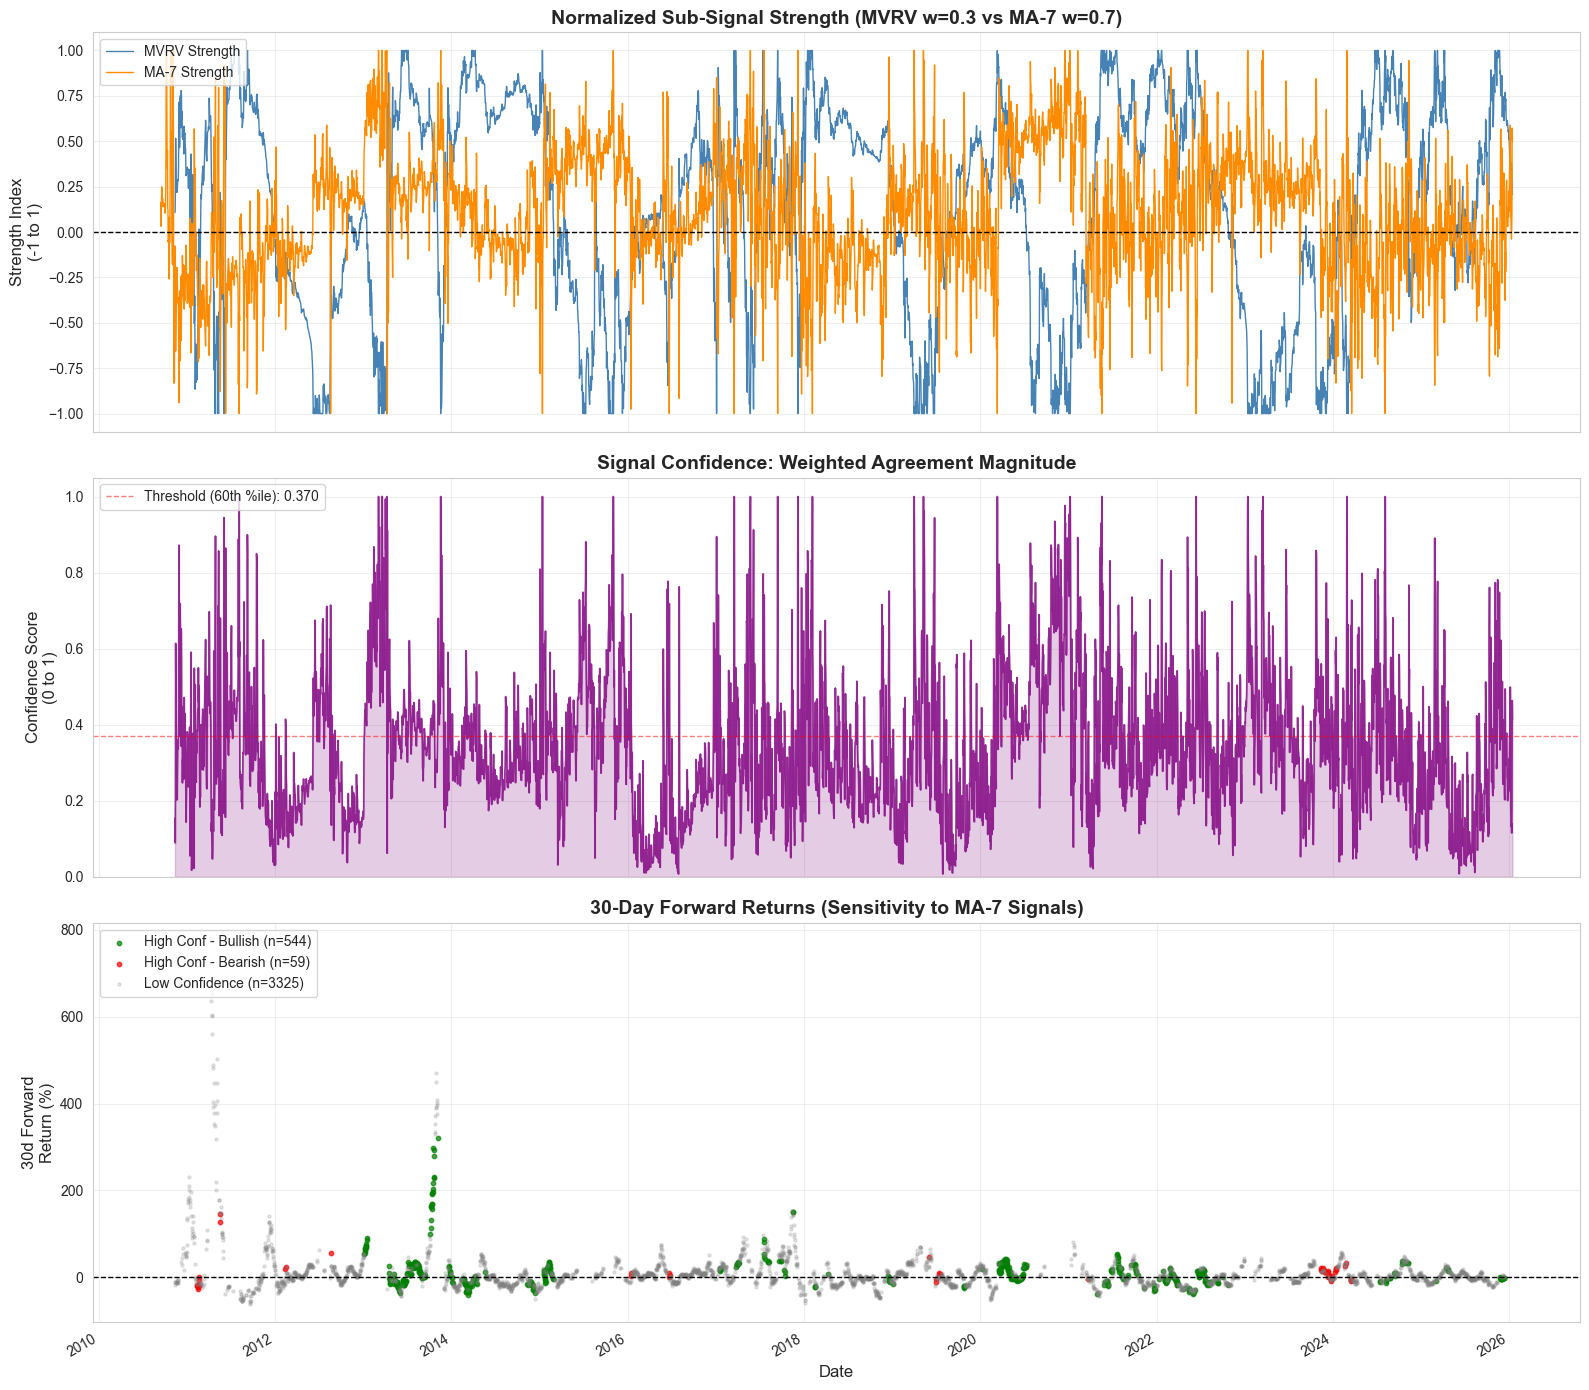


=== Signal Confidence Summary ===
Mode: EDA Analysis (may include forward leakage)
Configuration: MVRV_w=0.3, MA-7_w=0.7, Threshold=60th %ile
Confidence Threshold Value: 0.3700

High-conf bullish days  :  544 days  |  Avg 30d fwd return: +13.33%
High-conf bearish days  :   59 days  |  Avg 30d fwd return: +10.07%
Low-conf days           : 3325 days  |  Avg 30d fwd return: +10.74%


In [22]:
def calculate_signal_confidence(price, mvrv, dates, 
                                mvrv_weight=0.5, ma_weight=0.5,
                                ma_window=7, conf_threshold_pct=75,
                                mvrv_lookback=365,
                                avoid_forward_leakage=False):
    """
    Calculate multi-signal confidence scores combining MVRV valuation and MA trend.
    
    Parameters:
    -----------
    price : pd.Series
        Bitcoin price series
    mvrv : pd.Series
        MVRV ratio series
    dates : pd.Series
        Date series for alignment
    mvrv_weight : float
        Weight for MVRV strength (0-1), default 0.5
    ma_weight : float
        Weight for MA trend strength (0-1), default 0.5
    ma_window : int
        Moving average window in days, default 7
    conf_threshold_pct : float
        Confidence percentile threshold (0-100), default 75
    mvrv_lookback : int
        MVRV rolling window for z-score, default 365
    avoid_forward_leakage : bool
        If True, exclude last 30 days from forward-return calculation (backtest mode)
        If False, use all data (EDA/analysis mode). Default False.
    
    Returns:
    --------
    dict with keys: 'confidence', 'agree', 'high_conf_bull', 'high_conf_bear', 
                    'low_conf', 'fwd_ret', 'conf_thr', 'mvrv_strength', 'ma_strength'
    """
    
    # Handle missing values
    price = price.interpolate(method='linear')
    mvrv = mvrv.interpolate(method='linear')
    
    # 1. MVRV Z-Score
    mvrv_rolling_mean = mvrv.rolling(window=mvrv_lookback, min_periods=60).mean()
    mvrv_rolling_std = mvrv.rolling(window=mvrv_lookback, min_periods=60).std()
    mvrv_z = ((mvrv - mvrv_rolling_mean) / mvrv_rolling_std).clip(-4, 4)
    
    # 2. MA Trend Signal (Log deviation)
    log_p = np.log(price)
    ma_log = log_p.rolling(window=ma_window, min_periods=1).mean()
    trend_signal = (log_p - ma_log)
    
    # 3. Normalize Signals to [-1, 1] range
    def norm_signal(s):
        rolling_max = s.rolling(window=mvrv_lookback, min_periods=60).max()
        rolling_min = s.rolling(window=mvrv_lookback, min_periods=60).min()
        return (2 * (s - rolling_min) / (rolling_max - rolling_min + 1e-9) - 1).clip(-1, 1)
    
    mvrv_strength = norm_signal(-mvrv_z)  # Inverse: Low MVRV = High Strength
    ma_strength = norm_signal(trend_signal)
    
    # 4. Weighted Confidence & Agreement
    # Normalize weights to sum to 1
    total_weight = mvrv_weight + ma_weight
    mvrv_w_norm = mvrv_weight / total_weight
    ma_w_norm = ma_weight / total_weight
    
    confidence = (mvrv_strength.abs() * mvrv_w_norm + ma_strength.abs() * ma_w_norm)
    
    agree = ((mvrv_strength > 0) & (ma_strength > 0)).astype(int) \
            - ((mvrv_strength < 0) & (ma_strength < 0)).astype(int)
    
    # 5. Forward Returns & High Confidence Detection
    # IMPORTANT: 30-day forward return uses future price data!
    # In 1-year rolling windows, the last 30 days will reference dates AFTER window end
    fwd_ret = price.pct_change(30).shift(-30)
    
    # If backtest mode: exclude last 30 days to avoid forward leakage
    if avoid_forward_leakage:
        fwd_ret.iloc[-30:] = np.nan  # Mask future unreachable data
    
    conf_thr = confidence.quantile(conf_threshold_pct / 100)
    
    high_conf_bull = (confidence > conf_thr) & (agree > 0)
    high_conf_bear = (confidence > conf_thr) & (agree < 0)
    low_conf = confidence <= conf_thr
    
    return {
        'confidence': confidence,
        'agree': agree,
        'high_conf_bull': high_conf_bull,
        'high_conf_bear': high_conf_bear,
        'low_conf': low_conf,
        'fwd_ret': fwd_ret,
        'conf_thr': conf_thr,
        'mvrv_strength': mvrv_strength,
        'ma_strength': ma_strength
    }


# --- Execution with Configurable Parameters ---
# EDA MODE: Using all data for historical analysis (with forward leakage)
btc_filtered['date'] = pd.to_datetime(btc_filtered['date'])
price = btc_filtered['PriceUSD'].copy()
mvrv = btc_filtered['CapMVRVCur'].copy()
dates = btc_filtered['date']

# ADJUST THESE PARAMETERS AS NEEDED:
MVRV_WEIGHT = 0.3         # MVRV indicator weight (0-1)
MA_WEIGHT = 0.7           # MA trend indicator weight (0-1)
MA_WINDOW = 7             # Moving average period in days
CONF_THRESHOLD_PCT = 60   # Top X% confidence threshold
MVRV_LOOKBACK = 365       # MVRV z-score rolling window
AVOID_LEAKAGE = False     # EDA mode: False (use all data); Backtest: True

# Calculate signals with chosen parameters
signals = calculate_signal_confidence(
    price=price,
    mvrv=mvrv,
    dates=dates,
    mvrv_weight=MVRV_WEIGHT,
    ma_weight=MA_WEIGHT,
    ma_window=MA_WINDOW,
    conf_threshold_pct=CONF_THRESHOLD_PCT,
    mvrv_lookback=MVRV_LOOKBACK,
    avoid_forward_leakage=AVOID_LEAKAGE
)

# Unpack results
confidence = signals['confidence']
agree = signals['agree']
high_conf_bull = signals['high_conf_bull']
high_conf_bear = signals['high_conf_bear']
low_conf = signals['low_conf']
fwd_ret = signals['fwd_ret']
conf_thr = signals['conf_thr']
mvrv_strength = signals['mvrv_strength']
ma_strength = signals['ma_strength']

# --- Visualization ---
fig, axes = plt.subplots(3, 1, figsize=(16, 14), sharex=True)

# Panel 1: Sub-Signal Strength
ax = axes[0]
ax.plot(dates, mvrv_strength, linewidth=1.0, color='steelblue', label='MVRV Strength')
ax.plot(dates, ma_strength, linewidth=1.0, color='darkorange', label=f'MA-{MA_WINDOW} Strength')
ax.axhline(0, color='black', linewidth=1, linestyle='--')
ax.set_title(f'Normalized Sub-Signal Strength (MVRV w={MVRV_WEIGHT} vs MA-{MA_WINDOW} w={MA_WEIGHT})', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Strength Index\n(-1 to 1)', fontsize=12)
ax.set_ylim(-1.1, 1.1)
ax.legend(loc='upper left'); ax.grid(True, alpha=0.3)

# Panel 2: Signal Confidence
ax = axes[1]
ax.plot(dates, confidence, linewidth=1.2, color='purple', alpha=0.8)
ax.fill_between(dates, 0, confidence, alpha=0.2, color='purple')
ax.axhline(conf_thr, color='red', linestyle='--', linewidth=1, alpha=0.5, 
           label=f'Threshold ({CONF_THRESHOLD_PCT}th %ile): {conf_thr:.3f}')
ax.set_title('Signal Confidence: Weighted Agreement Magnitude', fontsize=14, fontweight='bold')
ax.set_ylabel('Confidence Score\n(0 to 1)', fontsize=12)
ax.set_ylim(0, 1.05)
ax.legend(loc='upper left'); ax.grid(True, alpha=0.3)

# Panel 3: 30-Day Forward Returns Analysis
ax = axes[2]
fwd_ret_pct = fwd_ret * 100

ax.scatter(dates[high_conf_bull], fwd_ret_pct[high_conf_bull], 
           s=10, color='green', alpha=0.7, label=f'High Conf - Bullish (n={high_conf_bull.sum()})')
ax.scatter(dates[high_conf_bear], fwd_ret_pct[high_conf_bear], 
           s=10, color='red', alpha=0.7, label=f'High Conf - Bearish (n={high_conf_bear.sum()})')
ax.scatter(dates[low_conf], fwd_ret_pct[low_conf], 
           s=5, color='grey', alpha=0.2, label=f'Low Confidence (n={low_conf.sum()})')

ax.axhline(0, color='black', linewidth=1, linestyle='--')
ax.set_title(f'30-Day Forward Returns (Sensitivity to MA-{MA_WINDOW} Signals)', fontsize=14, fontweight='bold')
ax.set_ylabel('30d Forward\nReturn (%)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend(loc='upper left'); ax.grid(True, alpha=0.3)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# --- Summary Statistics ---
print(f"\n=== Signal Confidence Summary ===")
print(f"Mode: {'Backtest (avoiding forward leakage)' if AVOID_LEAKAGE else 'EDA Analysis (may include forward leakage)'}")
print(f"Configuration: MVRV_w={MVRV_WEIGHT}, MA-{MA_WINDOW}_w={MA_WEIGHT}, Threshold={CONF_THRESHOLD_PCT}th %ile")
print(f"Confidence Threshold Value: {conf_thr:.4f}")
print(f"\nHigh-conf bullish days  : {high_conf_bull.sum():4d} days  |  Avg 30d fwd return: {fwd_ret[high_conf_bull].mean()*100:+.2f}%")
print(f"High-conf bearish days  : {high_conf_bear.sum():4d} days  |  Avg 30d fwd return: {fwd_ret[high_conf_bear].mean()*100:+.2f}%")
print(f"Low-conf days           : {low_conf.sum():4d} days  |  Avg 30d fwd return: {fwd_ret[low_conf].mean()*100:+.2f}%")